#Problem statement

In [ ]:
## Problem statement

The objective is to analyze SwiftCart’s sales data (2020–2024) to:

1. Identify key revenue and profit drivers across products, sales channels and regions.

2. Uncover seasonal patterns and anomalies to better understand demand fluctuations.

3. Evaluate performance against budgeted targets to measure financial alignment.

4. Provide actionable insights for optimizing pricing strategies, promotional campaigns and market expansion initiatives.

-> The ultimate goal is to enable sustainable growth, minimize market concentration risk and strengthen SwiftCart’s overall competitive position.


#  Importing Libaries & Assigning dataframes

In [ ]:
# Importing Libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sheets= pd.read_excel("/content/Regional Sales Dataset.xlsx",sheet_name=None)

In [ ]:
# Assign dataframes to each sheet

df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']


In [ ]:
print("df_sales shape: ", (df_sales.shape))
print("df_customers shape: ", (df_sales.shape))
print("df_products shape: ", (df_products.shape))
print("df_regions shape: ", (df_regions.shape))
print("df_state_reg shape: ", (df_state_reg.shape))
print("df_budgets shape: ", (df_budgets.shape))

df_sales shape:  (64104, 12)
df_customers shape:  (64104, 12)
df_products shape:  (30, 2)
df_regions shape:  (994, 15)
df_state_reg shape:  (48, 3)
df_budgets shape:  (30, 2)


# Exploring Data & Checking Null values

In [ ]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2020-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2020-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2020-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2020-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2020-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [ ]:
df_customers.head(5)


,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [ ]:
df_products.head(5)


,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [ ]:
df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [ ]:
df_state_reg.head(5)


,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [ ]:
df_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [ ]:
# Checking Null values

df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [ ]:
df_customers.isnull().sum()





,0
Customer Index,0
Customer Names,0


In [ ]:
df_products.isnull().sum()


,0
Index,0
Product Name,0


In [ ]:
df_regions.isnull().sum()


,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


In [ ]:
df_state_reg.isnull().sum()


,0
State Code,0
State,0
Region,0


In [ ]:
df_budgets.isnull().sum()

,0
Product Name,0
2017 Budgets,0


# Data Cleaning & Data Wrangling

In [ ]:
## Merge with Customers

df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2020-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2020-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2020-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2020-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2020-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [ ]:
# Merge with Products

df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

In [ ]:
df.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Index', 'Customer Names',
       'Index', 'Product Name'],
      dtype='object')

In [ ]:
# Merge with Regions

df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2020-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2020-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2020-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2020-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2020-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [ ]:
# Merge with Regions

df = df.merge(
    df_state_reg[["State Code","Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

In [ ]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2020-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2020-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2020-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2020-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2020-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [ ]:
df.shape

(64104, 33)

In [ ]:
# Merge with Budgets

df = df.merge(
    df_budgets,
    how='left',
    on='Product Name'
)

In [ ]:
#Customer Index
#Index
#id
#State Code

#Clean up redundant columns
cols_to_drop=["Customer Index","Index","id","State Code"]
df=df.drop(columns= cols_to_drop,errors="ignore")

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2020-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2020-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2020-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2020-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2020-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [ ]:
# Converts all columns to lower case for consistency and easier access
df.columns =df.columns.str.lower()

df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [ ]:
cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'county',
    'state',
    'region',
    'latitude',
    'longitude',
    '2017 budgets'
]

In [ ]:
df=df[cols_to_keep]

In [ ]:
# Rename the columns
df = df.rename(columns={
    'ordernumber': 'order_number',
    'orderdate': 'order_date',
    'customer names': 'customer_name',
    'product name': 'product_name',
    'order quantity': 'order_quantity',
    'unit price': 'unit_price',
    'line total': 'revenue',
    'total unit cost': 'cost',
    'state_code': 'state',
    'state': 'state_name',
    'latitude': 'lat',
    'longitude': 'lon',
    '2017 budgets': 'budget'
})

In [ ]:
df.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state,county,state_name,region,lat,lon,budget
0,SO - 000225,2020-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2020-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2020-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2020-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2020-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [ ]:
# Blank out budgets for non-2023 orders
df.loc[df['order_date'].dt.year != 2023, 'budget'] = pd.NA

# line total is revenue
df[['order_date','product_name','revenue','budget']].tail(5)


,order_date,product_name,revenue,budget
64099,2024-02-28,Product 26,21788.4,NaN
64100,2024-02-28,Product 21,5185.8,NaN
64101,2024-02-28,Product 13,43483.0,NaN
64102,2024-02-28,Product 20,27717.9,NaN
64103,2024-02-28,Product 15,7986.4,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_number    64104 non-null  object        
 1   order_date      64104 non-null  datetime64[ns]
 2   customer_name   64104 non-null  object        
 3   channel         64104 non-null  object        
 4   product_name    64104 non-null  object        
 5   order_quantity  64104 non-null  int64         
 6   unit_price      64104 non-null  float64       
 7   revenue         64104 non-null  float64       
 8   cost            64104 non-null  float64       
 9   state           64104 non-null  object        
 10  county          64104 non-null  object        
 11  state_name      64104 non-null  object        
 12  region          64104 non-null  object        
 13  lat             64104 non-null  float64       
 14  lon             64104 non-null  float64       
 15  bu

In [ ]:
## Filter the dataset to include only records from year 2023
df_2023 = df[df['order_date'].dt.year == 2023]




In [ ]:
# Check for missing values
df.isnull().sum()

,0
order_number,0
order_date,0
customer_name,0
channel,0
product_name,0
order_quantity,0
unit_price,0
revenue,0
cost,0
state,0


In [ ]:
df_2023.head()

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state,county,state_name,region,lat,lon,budget
46363,SO - 0002544,2023-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,Hudson County,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2023-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Mesa County,Colorado,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2023-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,Los Angeles County,California,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2023-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Dubuque County,Iowa,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2023-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Hernando County,Florida,South,28.47689,-82.52546,3050087.565


# Feature Engineering

In [ ]:
df['total_cost'] = df['order_quantity'] * df['cost']


In [ ]:
df['profit'] = df['revenue'] - df['total_cost']

df['profit_margin_pct'] = df['profit'] / df['revenue'] * 100


In [ ]:
df.head(5)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state,county,state_name,region,lat,lon,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2020-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2020-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2020-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2020-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2020-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


# EDA

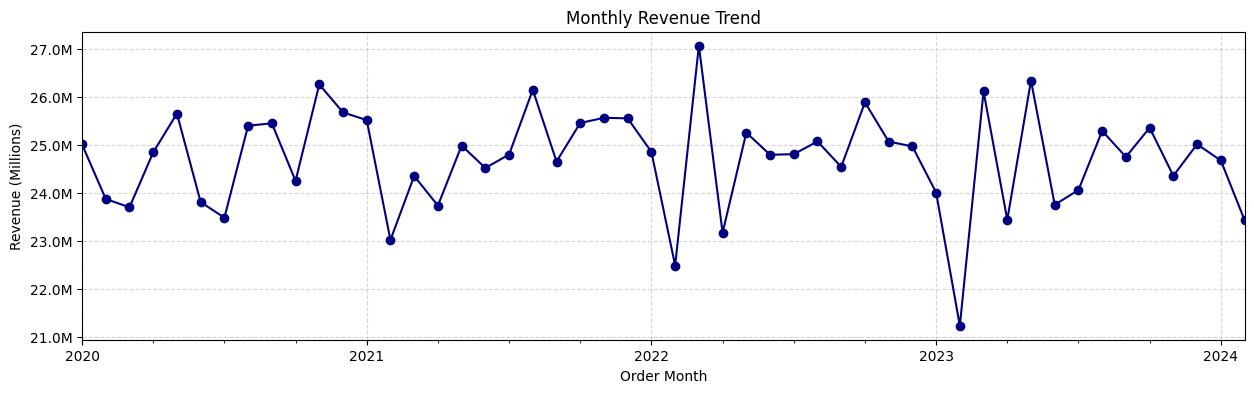

In [ ]:
df['order_month'] = df['order_date'].dt.to_period('M')

# Group revenue by month
monthly_sales = df.groupby('order_month')['revenue'].sum()

# Plot
plt.figure(figsize=(15,4))
monthly_sales.plot(marker='o', color='navy')

# Format y-axis in millions
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title("Monthly Revenue Trend")
plt.xlabel("Order Month")
plt.ylabel("Revenue (Millions)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


/tmp/ipython-input-4078850185.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['revenue']


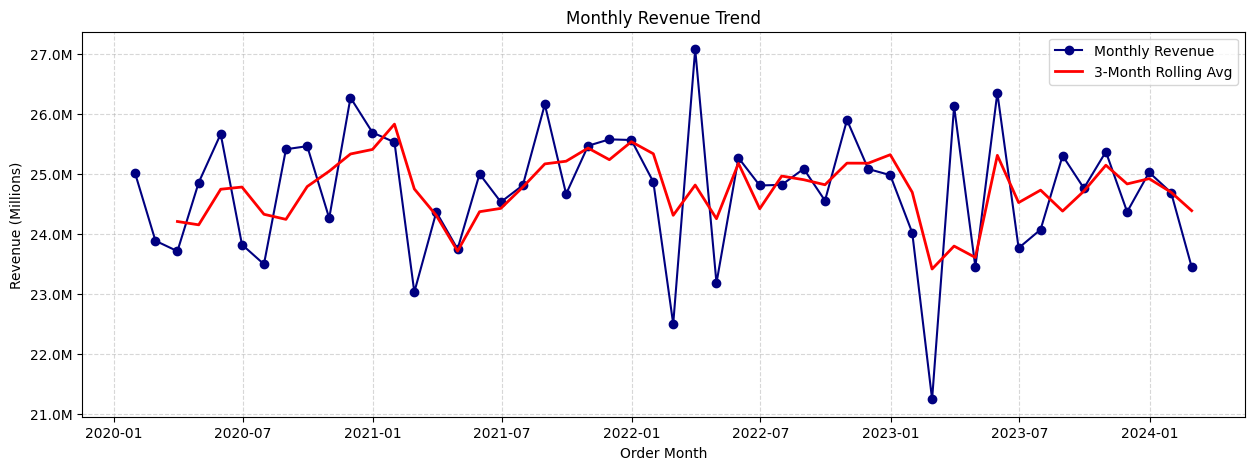

In [ ]:
# Convert to datetime if not already
df['order_date'] = pd.to_datetime(df['order_date'])

# Create monthly time series
monthly_sales = (
    df.set_index('order_date')
      .resample('M')['revenue']
      .sum()
      .fillna(0)  # fills missing months with 0
)

# Add a rolling average (3 months)
monthly_sales_ma = monthly_sales.rolling(window=3).mean()

# Plot
plt.figure(figsize=(15,5))
plt.plot(monthly_sales.index, monthly_sales, marker='o', color='navy', label='Monthly Revenue')
plt.plot(monthly_sales_ma.index, monthly_sales_ma, color='red', linewidth=2, label='3-Month Rolling Avg')

# Format y-axis in millions
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title("Monthly Revenue Trend")
plt.xlabel("Order Month")
plt.ylabel("Revenue (Millions)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

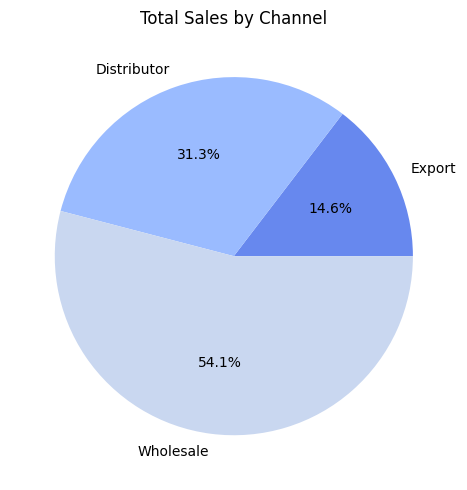

In [ ]:
# Sales by Channel
chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=True)

plt.figure(figsize=(5,5))

plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm')
)

plt.title('Total Sales by Channel')
plt.tight_layout()
plt.show()


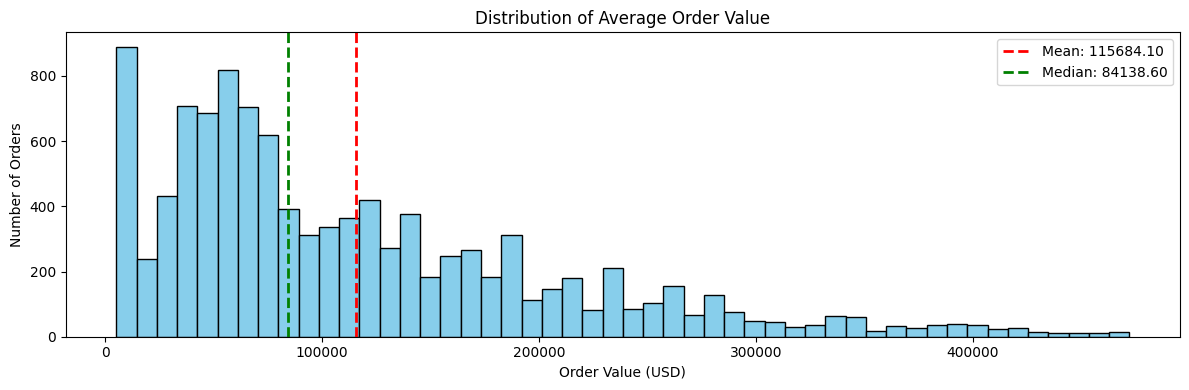

In [ ]:
# Group revenue by order to calculate order values
aov = df.groupby('order_number')['revenue'].sum()

# Create figure
plt.figure(figsize=(12,4))

# Plot histogram
plt.hist(
    aov,
    bins=50,
    color='skyblue',
    edgecolor='black'
)

# Add mean and median lines
plt.axvline(aov.mean(), color='red', linestyle='dashed', linewidth=2, label=f"Mean: {aov.mean():.2f}")
plt.axvline(aov.median(), color='green', linestyle='dashed', linewidth=2, label=f"Median: {aov.median():.2f}")

# Titles and labels
plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')
plt.legend()

# Layout & show
plt.tight_layout()
plt.show()

/tmp/ipython-input-2695718331.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_10, x='product_name', y='unit_price', palette='tab10')


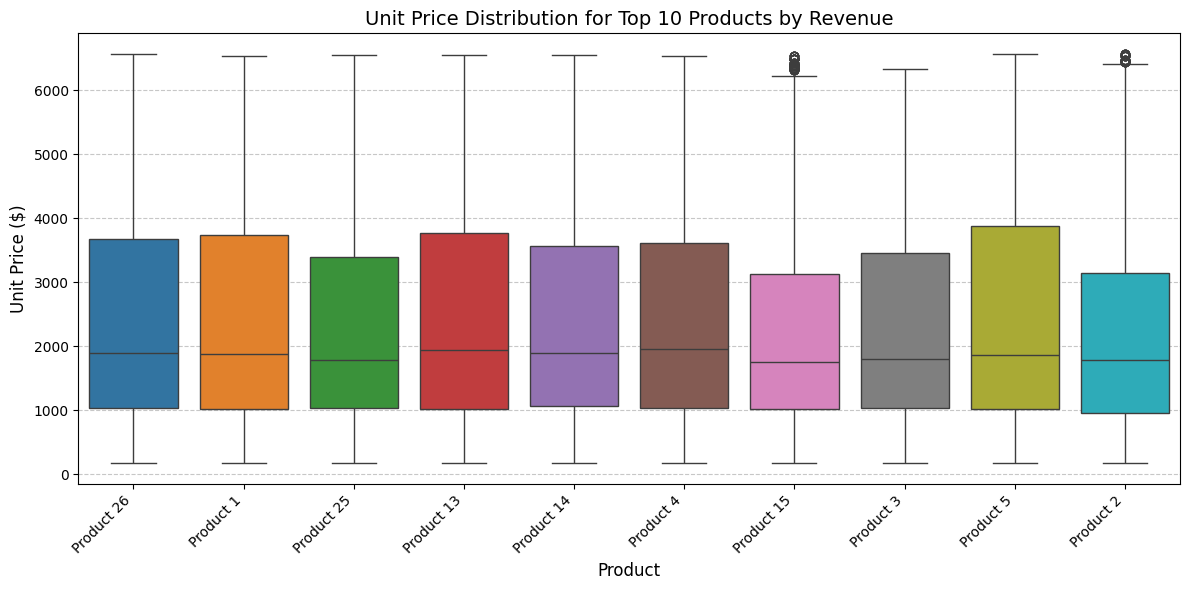

In [ ]:
# Group by product and get top 10 by revenue
product_revenue = df.groupby('product_name')['revenue'].sum().reset_index()
top_10_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)['product_name'].tolist()

# Filter dataframe for top 10 products
df_top_10 = df[df['product_name'].isin(top_10_products)]

# Create the boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top_10, x='product_name', y='unit_price', palette='tab10')

# Titles and labels
plt.title('Unit Price Distribution for Top 10 Products by Revenue', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Unit Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add grid for readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Layout & show
plt.tight_layout()
plt.show()

